<a href="https://colab.research.google.com/github/ambikapanse/Fraud-Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Downloading the dataset using kaggle API
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ambikapanse","key":"7fd1c7909d6c6207755ef3f1562c916d"}'}

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 97% 64.0M/66.0M [00:03<00:00, 23.1MB/s]
100% 66.0M/66.0M [00:04<00:00, 17.3MB/s]


In [5]:
!unzip /content/creditcardfraud.zip -d /content/creditcardfraud

Archive:  /content/creditcardfraud.zip
  inflating: /content/creditcardfraud/creditcard.csv  


In [6]:
#import libraries
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv('/content/creditcardfraud/creditcard.csv')

In [8]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [ ]:
legit

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [10]:
#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Class', ylabel='count'>

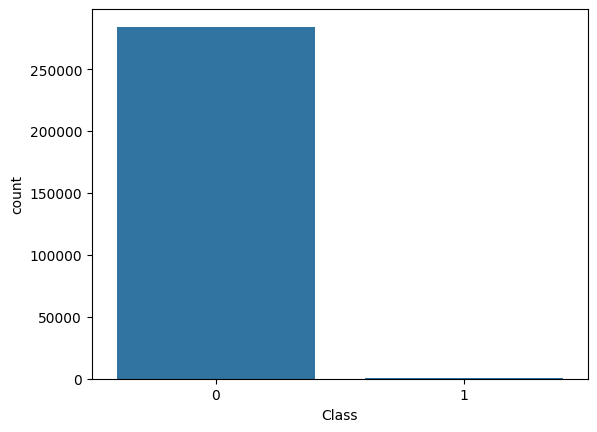

In [ ]:
sns.countplot(x='Class', data=df)

In [11]:
legit = legit.sample(n=1000)

In [12]:
new_df = pd.concat([legit, fraud], axis=0)

<Axes: xlabel='Class', ylabel='count'>

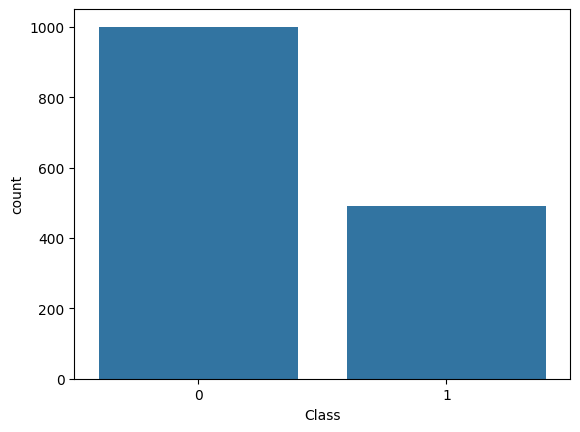

In [ ]:
sns.countplot(x="Class", data=new_df)

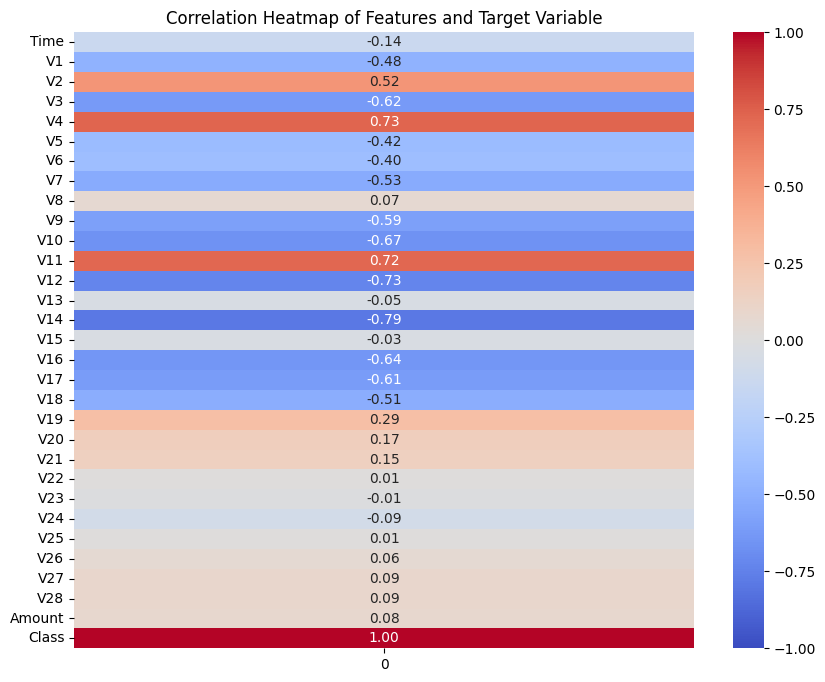

In [13]:
# Compute correlation matrix
corr_with_target = new_df.corrwith(new_df['Class'])

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_with_target.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Features and Target Variable')
plt.show()

In [14]:
#removing all features with correlation with Class weaker than 0.05
low_corr = corr_with_target[abs(corr_with_target) < 0.05].index.tolist()
new_df.drop(low_corr, axis=1, inplace=True)
print("Features with weak correlation: ",low_corr,"\n")
new_df.head()

Features with weak correlation:  ['V13', 'V15', 'V22', 'V23', 'V25'] 



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V18,V19,V20,V21,V24,V26,V27,V28,Amount,Class
159518,112589.0,0.380668,-0.042681,-0.019651,-1.734483,0.071599,-0.560845,0.266212,-0.130352,-1.424154,...,-0.593402,1.057378,0.125210,0.510225,-0.420014,-0.082644,0.109822,0.086105,27.90,0
77516,57086.0,-1.419094,0.444643,1.536719,-0.621977,-1.054207,0.272210,0.235759,0.148099,-0.713908,...,1.043250,-2.141719,-0.837689,-0.108461,0.060403,-0.471665,-0.611230,-0.108277,104.50,0
209278,137488.0,1.975786,-0.086274,-1.257411,1.150681,0.482374,0.324949,-0.075308,0.057583,0.494406,...,0.282123,0.183041,-0.230256,0.128984,0.235040,-0.482283,0.015474,-0.057794,9.99,0
263079,160791.0,1.815783,-0.192627,-1.868341,0.624630,0.059726,-1.445183,0.442335,-0.425651,0.579915,...,0.545383,-0.450027,0.054828,0.268677,-0.081361,-0.113224,-0.026463,-0.009575,130.71,0
146911,87958.0,-0.408393,0.796660,0.029085,-0.789186,0.500392,-0.665869,0.776360,-0.073496,0.140221,...,0.000029,0.353576,-0.178542,-0.204186,-0.384325,0.109840,-0.174149,0.094959,2.69,0


In [15]:
X = new_df.drop('Class', axis=1)
Y = new_df['Class']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [ ]:

classifier = {
    'lr' :  LogisticRegression(),
    'rfc' : RandomForestClassifier(),
    'svc' : SVC(kernel='rbf', C=1.0),
    'xgb' : xgb.XGBClassifier()
}

for name, clf in classifier.items():
  clf.fit(X_train, Y_train)
  y_pred = clf.predict(X_test)
  print("\n_____________________________________")
  print(name)
  print("_____________________________________")
  print("Accuracy: ", accuracy_score(Y_test, y_pred))
  print("F1 Score: ", f1_score(Y_test, y_pred))
  print("Recall: ", recall_score(Y_test, y_pred))
  print("Precision: ", precision_score(Y_test, y_pred))



_____________________________________
lr
_____________________________________
Accuracy:  0.9508928571428571
F1 Score:  0.9266666666666666
Recall:  0.879746835443038
Precision:  0.9788732394366197

_____________________________________
rfc
_____________________________________
Accuracy:  0.9598214285714286
F1 Score:  0.9411764705882353
Recall:  0.9113924050632911
Precision:  0.972972972972973

_____________________________________
svc
_____________________________________
Accuracy:  0.6473214285714286
F1 Score:  0.0
Recall:  0.0
Precision:  0.0

_____________________________________
xgb
_____________________________________
Accuracy:  0.9598214285714286
F1 Score:  0.9411764705882353
Recall:  0.9113924050632911
Precision:  0.972972972972973


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Classifier and XGB gave the best results overall.

#Random Forest Classifier

**estimator=rfc**: The model to be tuned.<br>
**param_grid=param_grid**: The dictionary of hyperparameters and values to be searched.<br>
**cv=3**: Number of cross-validation folds. The data is split into 3 parts, and the model is trained and validated 3 times, each time using a different part for validation and the remaining parts for training.<br>
**n_jobs=-1**: Use all available CPU cores for parallel processing, speeding up the computation.<br>
**verbose=2**: Controls the verbosity of the output. Higher values give more detailed messages.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rfc = RandomForestClassifier()

grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, Y_train)

print(grid_search.best_params_)


Fitting 3 folds for each of 243 candidates, totalling 729 fits
{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
best_rfc = grid_search.best_estimator_
best_rfc.fit(X_train, Y_train)
y_pred = best_rfc.predict(X_test)
print("Accuracy: ", accuracy_score(Y_test, y_pred))
print("F1 Score: ", f1_score(Y_test, y_pred))
print("Recall: ", recall_score(Y_test, y_pred))
print("Precision: ", precision_score(Y_test, y_pred))

Accuracy:  0.9642857142857143
F1 Score:  0.9470198675496688
Recall:  0.9050632911392406
Precision:  0.9930555555555556


#XGB

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.3],
    'min_child_weight': [1, 3, 5]
}

# Create the XGBoost classifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Configure GridSearchCV
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Train the model with grid search
grid_search.fit(X_train, Y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Fitting 3 folds for each of 972 candidates, totalling 2916 fits
Best Hyperparameters: {'colsample_bytree': 1.0, 'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.8}


In [ ]:
best_xgb = grid_search.best_estimator_
Y_pred = best_xgb.predict(X_test)

print("Accuracy: ", accuracy_score(Y_test, Y_pred))
print("F1 Score: ", f1_score(Y_test, Y_pred))
print("Recall: ", recall_score(Y_test, Y_pred))
print("Precision: ", precision_score(Y_test, Y_pred))

Accuracy:  0.9575892857142857
F1 Score:  0.9377049180327869
Recall:  0.9050632911392406
Precision:  0.9727891156462585


#SVM


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}
svc = SVC()
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Train the model with grid search
grid_search.fit(X_train, Y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


In [ ]:
best_svc = grid_search.best_estimator_
Y_pred = best_svc.predict(X_test)

print("Accuracy: ", accuracy_score(Y_test, Y_pred))
print("F1 Score: ", f1_score(Y_test, Y_pred))
print("Recall: ", recall_score(Y_test, Y_pred))
print("Precision: ", precision_score(Y_test, Y_pred))